In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from sklearn.model_selection import cross_val_score

In [172]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

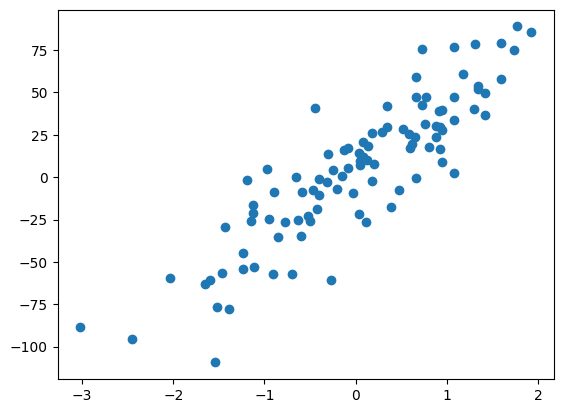

In [173]:
plt.scatter(X, y)
plt.show()

In [174]:
# Using Sklearn to fetch weights

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [175]:
np.mean(cross_val_score(model, X, y, scoring='r2', cv=10))

0.7116974238721024

In [176]:
model.fit(X, y)

model.coef_, model.intercept_

(array([37.24843217]), 3.857808052345784)

In [177]:
# Gradient Descent Class
class GDRegressor:
  def __init__(self, learning_rate=0.01, epochs=100):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.b = 0
    self.m = 0

  def fit(self, X, y):
    # Calculating weights
    for i in range(self.epochs):
      self.b = self.b - (self.learning_rate*(-2 * np.sum(y - self.m*X.ravel() - self.b)))
      self.m = self.m - (self.learning_rate*(-2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())))

  def predict(self, X):
    return self.m*X + self.b


In [178]:
gd = GDRegressor(epochs=100, learning_rate=0.001)

gd.fit(X,y)

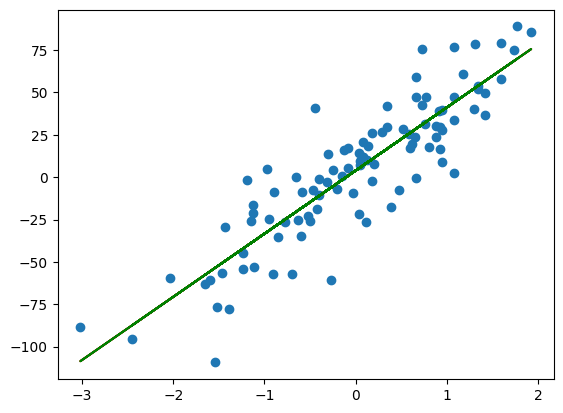

In [179]:
plt.scatter(X, y)
plt.plot(X, gd.predict(X), color='red')
plt.plot(X, model.predict(X), color='green')
plt.show()

In [180]:
model.intercept_, model.coef_

(3.857808052345784, array([37.24843217]))

In [181]:
gd.b , gd.m

(3.8578080553276037, 37.24843216061493)